In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'DejaVu Sans'

In [2]:
import FinanceDataReader as fdr
samsung = fdr.DataReader('005930')
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-26,88800,89200,86500,86700,33178936,-0.030201
2021-01-27,86600,87700,85600,85600,26423070,-0.012687
2021-01-28,83200,85600,83200,83700,31859808,-0.022196
2021-01-29,84500,85000,82000,82000,39615978,-0.020311
2021-02-01,81700,83400,81000,83000,19959302,0.012195


In [3]:
#apple = fdr.DataReader('AAPL')
#apple.head()

In [4]:
#ford = fdr.DataReader('F', '1980-01-01', '2019-12-30')
#ford.head()

In [5]:
#ford.tail()

In [6]:
STOCK_CODE = '005930'

In [7]:
stock = fdr.DataReader(STOCK_CODE)

In [8]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-02-19,1013,1024,1004,1023,104330,NaN
1997-02-20,1013,1031,999,1007,88710,-0.015640
1997-02-21,996,1004,933,943,143230,-0.063555
1997-02-22,933,969,916,966,124900,0.024390
1997-02-24,974,990,951,957,81070,-0.009317


In [9]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-26,88800,89200,86500,86700,33178936,-0.030201
2021-01-27,86600,87700,85600,85600,26423070,-0.012687
2021-01-28,83200,85600,83200,83700,31859808,-0.022196
2021-01-29,84500,85000,82000,82000,39615978,-0.020311
2021-02-01,81700,83400,81000,83000,19959302,0.012195


In [10]:
stock.index

DatetimeIndex(['1997-02-19', '1997-02-20', '1997-02-21', '1997-02-22',
               '1997-02-24', '1997-02-25', '1997-02-26', '1997-02-27',
               '1997-02-28', '1997-03-03',
               ...
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-02-01'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

# DatetimeIndex로 정의되어 있다면 연도, 월, 일을 쪼갤 수 있으며, 월별, 연도별 피벗 데이터를 만들 때 유용하게 활용할 수 있다

In [11]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [12]:
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1997-02-19,1013,1024,1004,1023,104330,NaN,1997,2,19
1997-02-20,1013,1031,999,1007,88710,-0.015640,1997,2,20
1997-02-21,996,1004,933,943,143230,-0.063555,1997,2,21
1997-02-22,933,969,916,966,124900,0.024390,1997,2,22
1997-02-24,974,990,951,957,81070,-0.009317,1997,2,24


<AxesSubplot:xlabel='Date', ylabel='Close'>

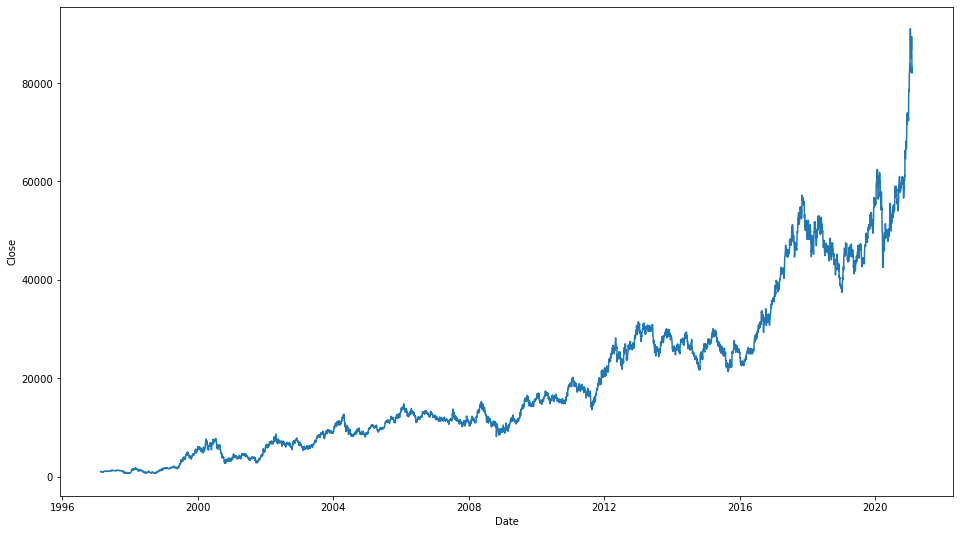

In [13]:
plt.figure(figsize=(16,9))
sns.lineplot(y=stock['Close'], x=stock.index)

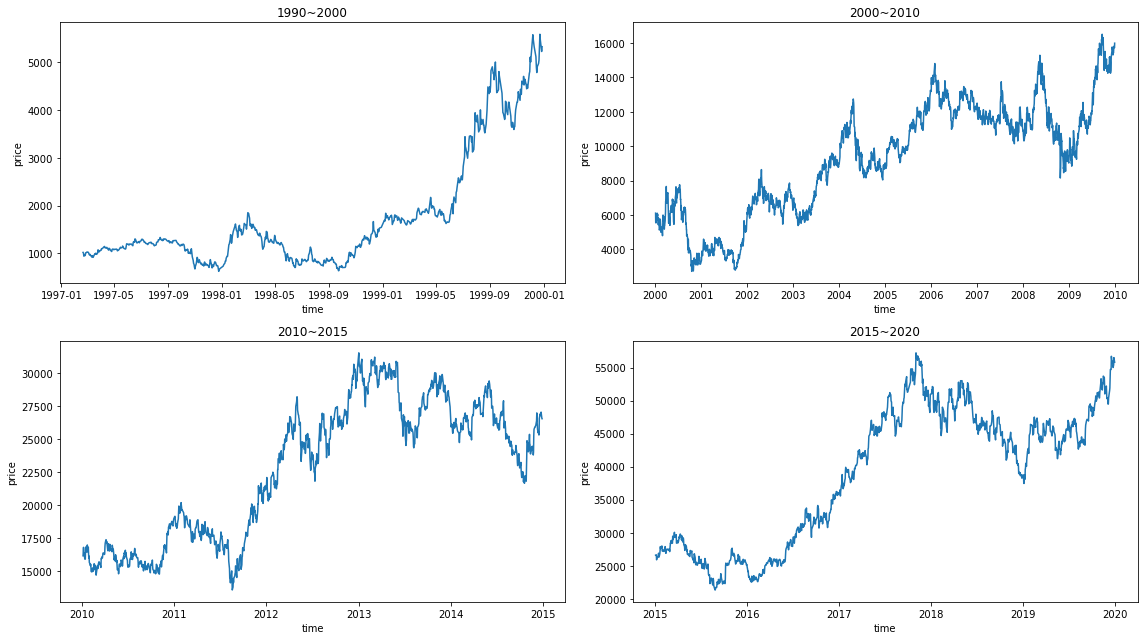

In [14]:
time_steps = [['1990', '2000'],
              ['2000', '2010'],
              ['2010', '2015'],
              ['2015', '2020']]
fig, axes = plt.subplots(2,2)
fig.set_size_inches(16,9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0])&(stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

# 데이터 전처리

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.01121816, 0.01057851, 0.01121788, 0.00438184, 0.00115529],
       [0.01121816, 0.01065083, 0.01116201, 0.0042048 , 0.00098232],
       [0.0110299 , 0.0103719 , 0.01042458, 0.00349662, 0.00158605],
       ...,
       [0.9213732 , 0.88429752, 0.92960894, 0.91922366, 0.35279766],
       [0.93576966, 0.87809917, 0.91620112, 0.90041273, 0.43868514],
       [0.9047619 , 0.86157025, 0.90502793, 0.91147799, 0.22101813]])

In [17]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close',1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [20]:
x_train.shape, y_train.shape

((4800, 4), (4800,))

In [21]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

In [22]:
x_train

,Open,High,Low,Volume
0,0.011218,0.010579,0.011218,0.001155
1,0.011218,0.010651,0.011162,0.000982
2,0.011030,0.010372,0.010425,0.001586
3,0.010332,0.010010,0.010235,0.001383
4,0.010786,0.010227,0.010626,0.000898
...,...,...,...,...
4795,0.263123,0.247727,0.263017,0.002031
4796,0.267553,0.255372,0.268380,0.003140
4797,0.271318,0.258884,0.271732,0.002959
4798,0.280620,0.263017,0.279106,0.002405


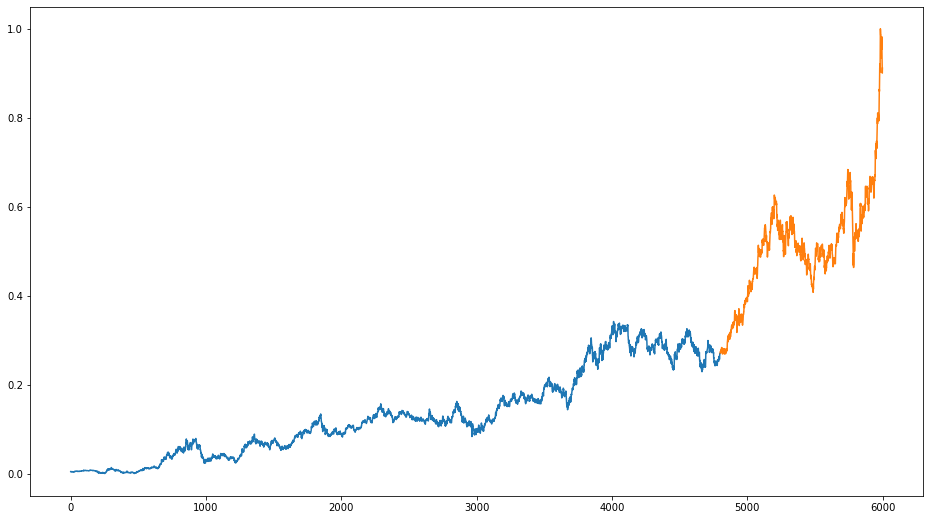

In [23]:
plt.figure(figsize=(16,9))
plt.plot(y_train)
plt.plot(y_test)

In [24]:
import tensorflow as tf

In [25]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [26]:
WINDOW_SIZE = 20
BATCH_SIZE = 32

In [27]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

In [28]:
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
    Conv1D(filters=32, kernel_size=5,
          padding="causal",
          activation="relu",
          input_shape=[WINDOW_SIZE, 1]),
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [29]:
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [30]:
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
filename = os.path.join('tmp', 'checkpointer.ckpt')
checkpoint = ModelCheckpoint(filename,
                            save_weights_only=True,
                            save_best_only=True,
                            monitor='val_loss',
                            verbose=1)

In [31]:
history = model.fit(train_data,
                   validation_data=(test_data),
                   epochs=50,
                   callbacks=[checkpoint, earlystopping])

Epoch 1/50
150/150 [==============================] - 5s 21ms/step - loss: 1.7712e-04 - mse: 3.5424e-04 - val_loss: 0.0025 - val_mse: 0.0050

Epoch 00001: val_loss improved from inf to 0.00251, saving model to tmp\checkpointer.ckpt
Epoch 2/50
150/150 [==============================] - 1s 7ms/step - loss: 1.4190e-05 - mse: 2.8379e-05 - val_loss: 0.0017 - val_mse: 0.0034

Epoch 00002: val_loss improved from 0.00251 to 0.00170, saving model to tmp\checkpointer.ckpt
Epoch 3/50
150/150 [==============================] - 1s 8ms/step - loss: 1.3730e-05 - mse: 2.7459e-05 - val_loss: 0.0022 - val_mse: 0.0044

Epoch 00003: val_loss did not improve from 0.00170
Epoch 4/50
150/150 [==============================] - 1s 9ms/step - loss: 1.3508e-05 - mse: 2.7015e-05 - val_loss: 0.0023 - val_mse: 0.0046

Epoch 00004: val_loss did not improve from 0.00170
Epoch 5/50
150/150 [==============================] - 1s 8ms/step - loss: 1.1633e-05 - mse: 2.3265e-05 - val_loss: 0.0023 - val_mse: 0.0046

Epoch 00

In [32]:
model.load_weights(filename)

In [33]:
pred = model.predict(test_data)

In [34]:
pred.shape

(1180, 1)

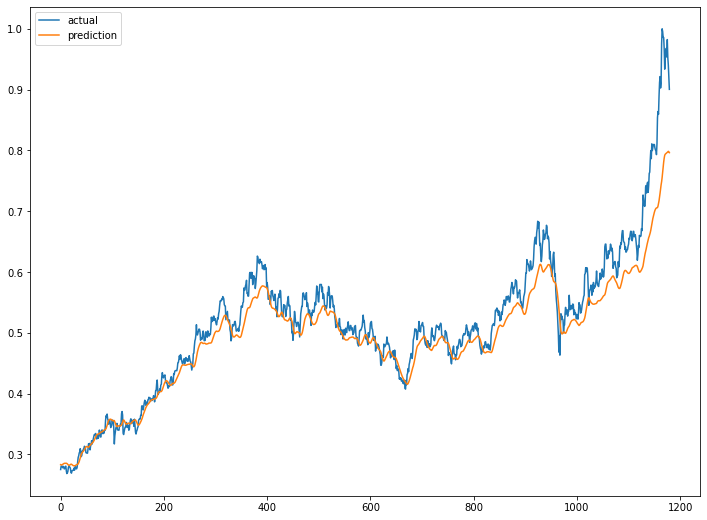

In [71]:
plt.figure(figsize=(12,9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()



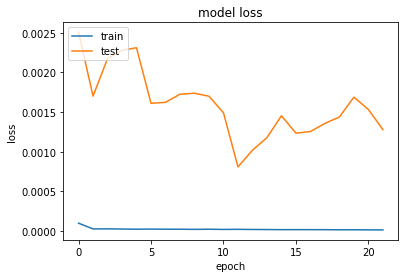

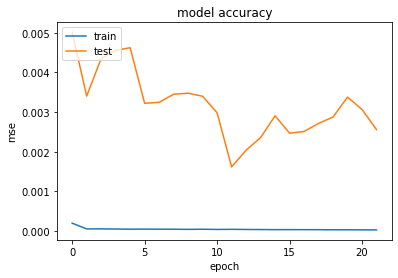

In [74]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [73]:
visualize_results(result)

NameError: name 'visualize_results' is not defined